## Symbolic Regression for Covariant Parsimony Pressure

## Testing various bloat control method 

The following is the testing for the symbolic regression with the parsimony coefficient set to auto. This is a covarient parsimony method which adapts the penalty depending on the relationship between program fitness and size in the population and will change from generation to generation

In [1]:
%pylab inline 
from gplearnmod.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import graphviz

Populating the interactive namespace from numpy and matplotlib


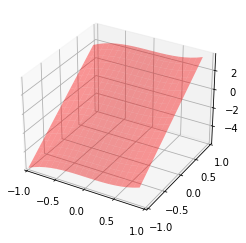

In [2]:
# Ground truth
x0 = np.arange(-1, 1, .1)
x1 = np.arange(-1, 1, .1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**3+ 4*x1 - 0.75 #true function

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(-1, 1.01, .5))
ax.set_yticks(np.arange(-1, 1.01, .5))
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='red', alpha=0.4)
plt.show()

In [3]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**3+ 4*X_train[:, 1] - 0.75

# Testing samples|
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**3+ 4*X_test[:, 1] - 0.75

In [4]:
est_gp = SymbolicRegressor(population_size=5000, #the number of programs in each generation
                           generations=50, stopping_criteria=0.01, #The required metric value required in order to stop evolution early.
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, #0.05, The probability of performing hoist mutation on a tournament winner. Hoist mutation takes the winner of a tournament and selects a random subtree from it. A random subtree of that subtree is then selected and this is ‘hoisted’ into the original subtrees location to form an offspring in the next generation. This method helps to control bloat.
                           p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient="auto", random_state=0)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13          459.188       25         0.434331         0.506694      3.49m
   1     5.51          2.68495        7         0.374657         0.419141      1.94m
   2     2.26          2.67798        3         0.712854          1.06588      1.78m
   3     1.52          1.95597        7         0.879456         0.838955      1.73m
   4     1.54          1.86138       15          0.73213           1.0495      1.67m
   5     1.69          1.92277        3         0.746267         0.700937      1.68m
   6     1.64          2.08039       15         0.353176         0.449744      1.66m
   7     1.59          2.77542        3         0.921246          1.03873      1.56m
   8     1.53          1.98053        7         0.864067          1.09502  

SymbolicRegressor(generations=50, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient='auto',
                  population_size=5000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [5]:
print(est_gp._program)

add(add(-0.667, div(X1, 0.341)), mul(sub(0.996, X0), add(X1, -0.686)))


In [6]:
sim = simplify(str(est_gp._program))
print(sim)

add(add(-0.667, (2.93255131964809*X1, 0)), mul(sub(0.996, X0), add(X1, -0.686)))


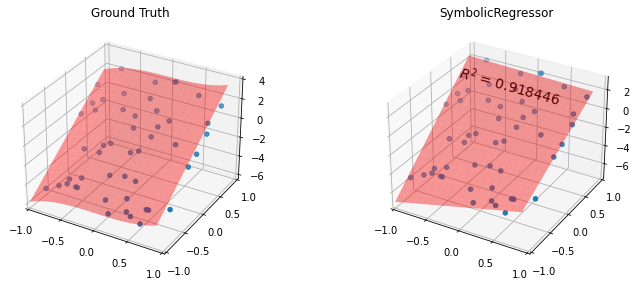

In [7]:
y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)
#y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
#score_tree = est_tree.score(X_test, y_test)
#y_rf = est_rf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
#score_rf = est_rf.score(X_test, y_test)

fig = plt.figure(figsize=(12, 10))

for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor")]):
                                       #(y_tree, score_tree, "DecisionTreeRegressor"),
                                       #(y_rf, score_rf, "RandomForestRegressor")]):

    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xticks(np.arange(-1, 1.01, .5))
    ax.set_yticks(np.arange(-1, 1.01, .5))
    surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='red', alpha=0.4)
    points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if score is not None:
        score = ax.text(-.7, 0.1, .1, "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
    plt.title(title)

plt.show()

## Conclusion

This is the worst perfomace in the overall testing since it runs over all 50 generation while having the worst accuracy. This is an unexpected result as the covariant method is a newly introduced method to tackle the issue of boat and maintain the good building blocks.